<a href="https://colab.research.google.com/github/franklinperseuDS/TrabalhoModulo03/blob/main/trabalhoEstatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Pacotes necessários
import pandas as pd
import numpy as np
import statistics as st
import seaborn as se
import statsmodels.stats.proportion as smp
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#DataFrames

In [4]:
dfMicroDados =  pd.read_csv('/content/drive/Shared drives/Trabalho Estátistica/microdados_enade_2016.csv',sep=';',decimal=',')


In [30]:
dfConceito = pd.read_excel('/content/drive/Shared drives/Trabalho Estátistica/conceito_enade2016.xlsx')

In [29]:
dfMicroDados.shape

NameError: ignored

In [60]:
dfConceito.columns

Index(['Ano', 'Código da IES', 'Nome da IES', 'Sigla da IES',
       'Organização Acadêmica', 'Categoria Administrativa', 'CodCurso',
       'Código da Área', 'Área de Enquadramento', 'Modalidade de Ensino',
       'Código do Município', 'Município do Curso', 'Sigla da UF',
       'Concluintes Inscritos', 'Concluintes Participantes', 'Nota Bruta - FG',
       'Nota Padronizada - FG', 'Nota Bruta - CE', 'Nota Padronizada - CE',
       'Conceito Enade (Contínuo)', 'Conceito Enade (Faixa)'],
      dtype='object')

#aqui é a questão 2

In [59]:

dfConceito = dfConceito.rename(columns={'Código do Curso': 'CodCurso'})

In [62]:
#dfMedicina.query('CO_REGIAO_CURSO == 1')['CO_UF_CURSO'],['NT_GER']
dfConceito.query('CodCurso == 12')['Modalidade de Ensino'].value_counts() # saber se tem 

Educação Presencial    1
Name: Modalidade de Ensino, dtype: int64

In [8]:
dfMedicina = df.loc[df['CO_GRUPO'] == 12]

In [9]:
dfMedicina.columns[30:40]

Index(['DS_VT_ACE_OFG', 'DS_VT_ESC_OCE', 'DS_VT_ACE_OCE', 'TP_PRES',
       'TP_PR_GER', 'TP_PR_OB_FG', 'TP_PR_DI_FG', 'TP_PR_OB_CE', 'TP_PR_DI_CE',
       'TP_SFG_D1'],
      dtype='object')

CO_REGIAO_CURSO
1 = Região Norte (NO)
2 = Região Nordeste (NE)
3 = Região Sudeste (SE)
4 = Região Sul (SUL)
5 = Região Centro-Oeste (CO)

In [11]:
regiaoNorte =  dfMedicina.loc[df["CO_REGIAO_CURSO"] == 1]

In [12]:
regiaoNorte

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,NU_IDADE,TP_SEXO,ANO_FIM_EM,ANO_IN_GRAD,CO_TURNO_GRADUACAO,TP_INSCRICAO_ADM,TP_INSCRICAO,NU_ITEM_OFG,NU_ITEM_OFG_Z,NU_ITEM_OFG_X,NU_ITEM_OFG_N,NU_ITEM_OCE,NU_ITEM_OCE_Z,NU_ITEM_OCE_X,NU_ITEM_OCE_N,DS_VT_GAB_OFG_ORIG,DS_VT_GAB_OFG_FIN,DS_VT_GAB_OCE_ORIG,DS_VT_GAB_OCE_FIN,DS_VT_ESC_OFG,DS_VT_ACE_OFG,DS_VT_ESC_OCE,DS_VT_ACE_OCE,TP_PRES,TP_PR_GER,TP_PR_OB_FG,TP_PR_DI_FG,TP_PR_OB_CE,TP_PR_DI_CE,TP_SFG_D1,...,QE_I29,QE_I30,QE_I31,QE_I32,QE_I33,QE_I34,QE_I35,QE_I36,QE_I37,QE_I38,QE_I39,QE_I40,QE_I41,QE_I42,QE_I43,QE_I44,QE_I45,QE_I46,QE_I47,QE_I48,QE_I49,QE_I50,QE_I51,QE_I52,QE_I53,QE_I54,QE_I55,QE_I56,QE_I57,QE_I58,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68
1616,2019,4,10002,10028,12,389,1,1302603,13,1,22,M,2013,2014.0,3.0,1,0,8,1,0,0,27,0,3,0,ZDCBCCDB,ZDCBCCDB,DBDEACBBBEBCACBAADCECEDAEEE,DBXEACBBBEBCAXBAADCXCEDAEEE,ADCBCCEB,81111101,DEE.AABBBABCEBBAADCCCEAAEAE,109010111011091111191101101,555,555,555,555,555,555,555,...,2.0,2.0,4.0,3.0,3.0,4.0,3.0,5.0,5.0,2.0,3.0,3.0,1.0,2.0,6.0,6.0,6.0,3.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,2.0,4.0,2.0,4.0,5.0,1.0,4.0,4.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0
1617,2019,4,10002,10028,12,389,1,1302603,13,1,24,F,2013,2014.0,3.0,1,0,8,1,0,0,27,0,3,0,ZDCBCCDB,ZDCBCCDB,DBDEACBBBEBCACBAADCECEDAEEE,DBXEACBBBEBCAXBAADCXCEDAEEE,EDCDDCEE,81100100,DEAECAB*BDECEBBABDAECEEAEAE,109100101001091101091101101,555,555,555,555,555,555,555,...,3.0,5.0,4.0,6.0,4.0,4.0,5.0,6.0,5.0,4.0,5.0,4.0,5.0,6.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,6.0,7.0,4.0,4.0,5.0,5.0,3.0,6.0,6.0,5.0,5.0,2.0,4.0,3.0,4.0,4.0,8.0,3.0,4.0
1618,2019,4,10002,10028,12,389,1,1302603,13,1,24,M,2013,2014.0,3.0,1,0,8,1,0,0,27,0,3,0,ZDCBCCDB,ZDCBCCDB,DBDEACBBBEBCACBAADCECEDAEEE,DBXEACBBBEBCAXBAADCXCEDAEEE,EADBDBEB,80010001,DBCEADBBBEBCACBAEDAECEEAEAE,119110111111191101091101101,555,555,555,555,555,555,555,...,3.0,2.0,6.0,5.0,4.0,5.0,4.0,5.0,3.0,5.0,5.0,3.0,5.0,5.0,5.0,4.0,3.0,8.0,4.0,4.0,4.0,5.0,7.0,4.0,4.0,1.0,4.0,3.0,5.0,5.0,3.0,5.0,5.0,4.0,4.0,3.0,2.0,5.0,2.0,4.0
1619,2019,4,10002,10028,12,389,1,1302603,13,1,24,F,2013,2014.0,3.0,1,0,8,1,0,0,27,0,3,0,ZDCBCCDB,ZDCBCCDB,DBDEACBBBEBCACBAADCECEDAEEE,DBXEACBBBEBCAXBAADCXCEDAEEE,EDEBDCDB,81010111,BBAAABBBBEBBACBACCBEAEECAEE,019010111110191100090100011,555,555,555,555,555,555,555,...,2.0,2.0,5.0,3.0,5.0,4.0,5.0,6.0,5.0,4.0,6.0,4.0,2.0,6.0,6.0,6.0,5.0,8.0,5.0,2.0,3.0,3.0,7.0,1.0,1.0,3.0,3.0,2.0,3.0,4.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0
1620,2019,4,10002,10028,12,389,1,1302603,13,1,27,M,2010,2015.0,3.0,1,0,8,1,0,0,27,0,3,0,ZDCBCCDB,ZDCBCCDB,DBDEACBBBEBCACBAADCECEDAEEE,DBXEACBBBEBCAXBAADCXCEDAEEE,ADCCCCEB,81101101,DCDEACBBAAEAABBAACCEEEDAEAA,109111110000191110190111100,555,555,555,555,555,555,555,...,1.0,1.0,3.0,4.0,4.0,2.0,4.0,4.0,2.0,1.0,1.0,1.0,2.0,5.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,7.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341175,2019,4450,10008,10020,12,1171609,1,1501402,15,1,25,F,2010,2014.0,3.0,1,0,8,1,0,0,27,0,3,0,ZDCBCCDB,ZDCBCCDB,DBDEACBBBEBCACBAADCECEDAEEE,DBXEACBBBEBCAXBAADCXCEDAEEE,DDCCEBDB,81100011,DCAEABAEDEEBADBACCCCCEDAEAE,109110000100191100191111101,555,555,555,555,555,555,555,...,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,4.0,6.0,6.0,6.0,6.0,3.0,6.0,5.0,5.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0
341176,2019,4450,10008,10020,12,1171609,1,1501402,15,1,30,F,2006,2014.0,3.0,1,0,8,1,0,0,27,0,3,0,ZDCBCCDB,ZDCBCCDB,DBDEACBBBEBCACBAADCECEDAEEE,DBXEACBBBEBCAXBAADCXCEDAEEE,BDCBDADB,81110011,DEAACBDBBBBCADBAACCECADAEBE,109000011011191110191011101,555,555,555,555,555,555,555,...,6.0,6.0,6.0,6.0,6.0

In [21]:
regiaoNorte = dfMedicina.query('CO_REGIAO_CURSO == 1')['CO_UF_CURSO'],['NT_GER']

In [22]:
regiaoNorte.groupby(['CO_UF_CURSO']).plot.bar

AttributeError: ignored

In [19]:
print(RNG)

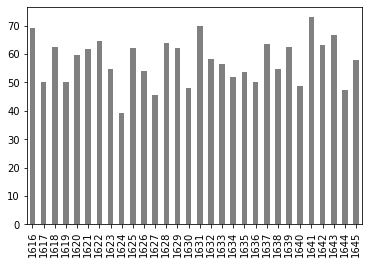

In [14]:
regiaoNorte['NT_GER'][:30].plot.bar(color = 'gray')

In [58]:
a

15

In [57]:
a = 15